c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

Structured Data Sample:
   square_footage  bedrooms  bathrooms  year_built  lot_size  location_score  \
0            2397         4        1.0        2015     10140        6.666655   
1            1889         1        3.5        1990      5564        8.771361   
2            2518         3        2.5        1973      2994        2.190592   
3            3218         5        2.5        1984      3889        9.798310   
4            1812         3        4.0        2005      7336        6.243658   

   has_garage  has_pool   price  
0           0         0  719851  
1           1         0  665894  
2           0         0  636913  
3           1         0  923586  
4           1         0  591763  

Dataset shape: (1000, 9)
Created 1000 synthetic house images
Loading training images...
Loading test images...
Model summary:


Model: "multimodal_housing_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │        576 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     65,664 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_features      │ (None, 64)        │      8,256 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_features │ (None, 16)        │        528 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 80)        │          0 │ image_features[0… │
│ (Concatenate)       │                   │            │ structured_featu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      5,184 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        528 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price_prediction    │ (None, 1)         │         17 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,799,601 (56.46 MB)

 Trainable params: 84,913 (331.69 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Training the multimodal model...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - loss: 441073926144.0000 - mae: 650559.7500 - val_loss: 435307970560.0000 - val_mae: 647661.5000 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - loss: 440773967872.0000 - mae: 650330.3125 - val_loss: 434354978816.0000 - val_mae: 646928.5000 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - loss: 436699430912.0000 - mae: 647201.6250 - val_loss: 423442808832.0000 - val_mae: 638477.3750 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - loss: 403692453888.0000 - mae: 621125.6250 - val_loss: 350630379520.0000 - val_mae: 578971.5625 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - loss: 254467588096.0000 - mae: 481324.9688 - val_loss: 107687542784.0000 - val_mae: 306921.3438 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - loss: 42810552320.0000 - mae: 167288.0469 - val_l

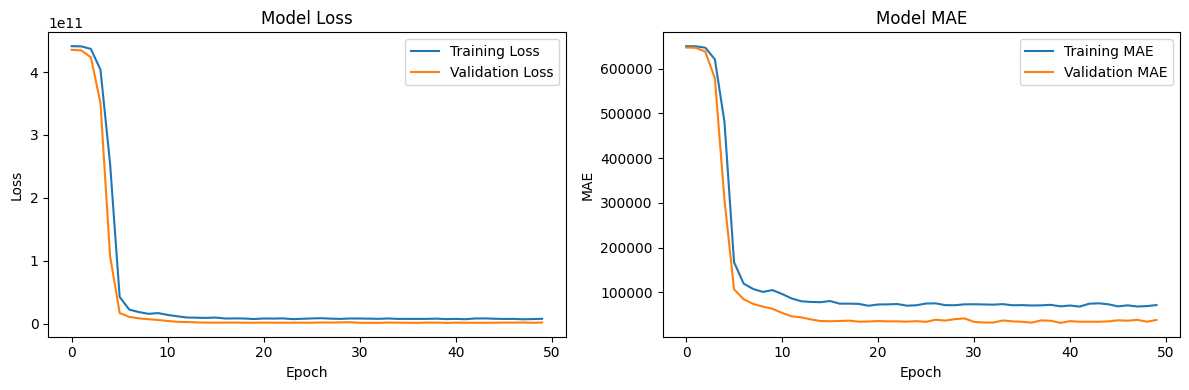

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step
Test MAE: $31,456.11
Test RMSE: $39,748.20


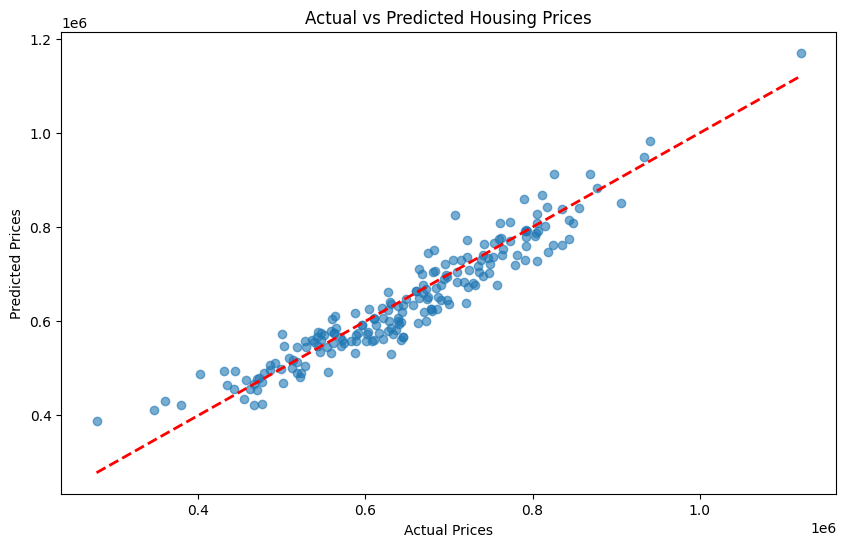

Mean Absolute Percentage Error: 5.10%
Training structured-only model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MODEL COMPARISON
Multimodal Model - MAE: $31,456.11, RMSE: $39,748.20
Structured Only  - MAE: $647,696.62, RMSE: $659,813.37
Improvement with multimodal approach:
MAE:  95.14%
RMSE: 93.98%
Training image-only model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step
FULL MODEL COMPARISON
Multimodal Model  - MAE: $31,456.11, RMSE: $39,748.20
Structured Only   - MAE: $647,696.62, RMSE: $659,813.37
Image Only        - MAE: $647,678.06, RMSE: $659,795.09


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from PIL import Image
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info and warning messages

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Generate synthetic structured housing data
def generate_structured_data(n_samples=1000):
    np.random.seed(42)
    
    data = {
        'square_footage': np.random.normal(2000, 800, n_samples).astype(int),
        'bedrooms': np.random.randint(1, 7, n_samples),
        'bathrooms': np.random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4], n_samples),
        'year_built': np.random.randint(1950, 2020, n_samples),
        'lot_size': np.random.normal(10000, 4000, n_samples).astype(int),
        'location_score': np.random.uniform(1, 10, n_samples),  # Neighborhood quality
        'has_garage': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
        'has_pool': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    }
    
    df = pd.DataFrame(data)
    
    # Create a realistic price based on features with some noise
    base_price = 100000
    price = (
        base_price + 
        df['square_footage'] * 150 + 
        df['bedrooms'] * 20000 + 
        df['bathrooms'] * 15000 + 
        (2023 - df['year_built']) * 500 + 
        df['lot_size'] * 5 + 
        df['location_score'] * 10000 + 
        df['has_garage'] * 15000 + 
        df['has_pool'] * 25000 +
        np.random.normal(0, 30000, n_samples)
    )
    
    df['price'] = price.astype(int)
    return df

# Generate the structured data
housing_df = generate_structured_data(1000)
print("Structured Data Sample:")
print(housing_df.head())
print(f"\nDataset shape: {housing_df.shape}")

# 2. Create synthetic house images
def create_synthetic_images(n_samples=1000, img_height=224, img_width=224):
    """
    Create synthetic house images for demonstration.
    In a real scenario, replace this with actual image loading.
    """
    # Create a directory for images if it doesn't exist
    os.makedirs('house_images', exist_ok=True)
    
    # House colors to choose from
    house_colors = [
        [139, 69, 19],    # Brown
        [160, 82, 45],    # Sienna
        [210, 105, 30],   # Chocolate
        [222, 184, 135],  # Burlywood
        [244, 164, 96]    # Sandy brown
    ]
    
    # We'll create simple synthetic images with different colors
    # representing different house styles/conditions
    for i in range(n_samples):
        # Create a base image (blue sky)
        img = np.zeros((img_height, img_width, 3), dtype=np.uint8)
        img[:, :] = [135, 206, 235]  # Sky blue
        
        # Add a "house" rectangle (different colors for different styles)
        color_idx = np.random.randint(0, len(house_colors))
        house_color = house_colors[color_idx]
        
        # House size varies with square footage
        house_height = int(img_height * 0.5 * (housing_df.iloc[i]['square_footage'] / 2000))
        house_width = int(img_width * 0.6 * (housing_df.iloc[i]['square_footage'] / 2000))
        
        start_y = img_height - house_height
        start_x = (img_width - house_width) // 2
        
        img[start_y:start_y+house_height, start_x:start_x+house_width] = house_color
        
        # Add windows (yellow)
        if house_height > 50 and house_width > 50:
            window_size = min(house_height, house_width) // 5
            img[start_y+house_height//4:start_y+house_height//4+window_size, 
                start_x+house_width//4:start_x+house_width//4+window_size] = [255, 255, 0]  # Yellow
            img[start_y+house_height//4:start_y+house_height//4+window_size, 
                start_x+3*house_width//4-window_size:start_x+3*house_width//4] = [255, 255, 0]
        
        # Add a door (brown)
        if house_height > 70:
            door_height = house_height // 3
            door_width = house_width // 5
            img[start_y+house_height-door_height:start_y+house_height, 
                start_x+house_width//2-door_width//2:start_x+house_width//2+door_width//2] = [101, 67, 33]
        
        # Save the image
        image = Image.fromarray(img)
        image.save(f'house_images/house_{i}.jpg')
    
    print(f"Created {n_samples} synthetic house images")

# Create the synthetic images
create_synthetic_images(1000)

# 3. Prepare the data for training
# Split the data into features and target
X_structured = housing_df.drop('price', axis=1)
y = housing_df['price']

# Split into train and test sets
X_train_struct, X_test_struct, y_train, y_test = train_test_split(
    X_structured, y, test_size=0.2, random_state=42
)

# Scale the structured features
scaler = StandardScaler()
X_train_struct_scaled = scaler.fit_transform(X_train_struct)
X_test_struct_scaled = scaler.transform(X_test_struct)

# Prepare image paths for the training and test sets
train_indices = X_train_struct.index
test_indices = X_test_struct.index

train_image_paths = [f'house_images/house_{i}.jpg' for i in train_indices]
test_image_paths = [f'house_images/house_{i}.jpg' for i in test_indices]

# Create a function to load and preprocess images
def load_images(image_paths, target_size=(224, 224)):
    images = []
    for path in image_paths:
        img = Image.open(path).resize(target_size)
        img_array = np.array(img) / 255.0
        images.append(img_array)
    return np.array(images)

# Load all images
print("Loading training images...")
train_images = load_images(train_image_paths)
print("Loading test images...")
test_images = load_images(test_image_paths)

# 4. Build the multimodal model
def create_multimodal_model(structured_input_dim):
    # Image branch
    image_input = layers.Input(shape=(224, 224, 3))
    
    # Use a pre-trained VGG16 as a feature extractor
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the pre-trained layers
    
    x = base_model(image_input)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    image_branch = layers.Dense(64, activation='relu', name='image_features')(x)
    
    # Structured data branch
    structured_input = layers.Input(shape=(structured_input_dim,))
    y = layers.Dense(64, activation='relu')(structured_input)
    y = layers.Dropout(0.2)(y)
    y = layers.Dense(32, activation='relu')(y)
    structured_branch = layers.Dense(16, activation='relu', name='structured_features')(y)
    
    # Concatenate both branches
    combined = layers.concatenate([image_branch, structured_branch])
    
    # Final regression layers
    z = layers.Dense(64, activation='relu')(combined)
    z = layers.Dropout(0.3)(z)
    z = layers.Dense(32, activation='relu')(z)
    z = layers.Dense(16, activation='relu')(z)
    output = layers.Dense(1, activation='linear', name='price_prediction')(z)
    
    # Create model
    model = keras.Model(
        inputs=[image_input, structured_input], 
        outputs=output,
        name='multimodal_housing_model'
    )
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Create the model
model = create_multimodal_model(X_train_struct_scaled.shape[1])
print("Model summary:")
model.summary()

# 5. Train the Model
# Add callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train the model
print("Training the multimodal model...")
history = model.fit(
    [train_images, X_train_struct_scaled], y_train,
    validation_data=([test_images, X_test_struct_scaled], y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# 6. Evaluate the Model
# Plot training history
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot MAE
    ax2.plot(history.history['mae'], label='Training MAE')
    ax2.plot(history.history['val_mae'], label='Validation MAE')
    ax2.set_title('Model MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

# Make predictions on test set
predictions = model.predict([test_images, X_test_struct_scaled])
predictions = predictions.flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Test MAE: ${mae:,.2f}")
print(f"Test RMSE: ${rmse:,.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

# Calculate percentage error
percentage_error = np.abs((y_test - predictions) / y_test) * 100
mean_percentage_error = np.mean(percentage_error)

print(f"Mean Absolute Percentage Error: {mean_percentage_error:.2f}%")

# 7. Compare with Baseline Models
# Compare with a model using only structured data
def create_structured_only_model(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Train structured-only model
print("Training structured-only model...")
structured_model = create_structured_only_model(X_train_struct_scaled.shape[1])
structured_history = structured_model.fit(
    X_train_struct_scaled, y_train,
    validation_data=(X_test_struct_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=0
)

# Make predictions with structured-only model
structured_predictions = structured_model.predict(X_test_struct_scaled).flatten()
structured_mae = mean_absolute_error(y_test, structured_predictions)
structured_rmse = np.sqrt(mean_squared_error(y_test, structured_predictions))

print("=" * 50)
print("MODEL COMPARISON")
print("=" * 50)
print(f"Multimodal Model - MAE: ${mae:,.2f}, RMSE: ${rmse:,.2f}")
print(f"Structured Only  - MAE: ${structured_mae:,.2f}, RMSE: ${structured_rmse:,.2f}")
print("=" * 50)

improvement_mae = (structured_mae - mae) / structured_mae * 100
improvement_rmse = (structured_rmse - rmse) / structured_rmse * 100

print(f"Improvement with multimodal approach:")
print(f"MAE:  {improvement_mae:.2f}%")
print(f"RMSE: {improvement_rmse:.2f}%")

# 8. Compare with image-only model
def create_image_only_model():
    # Image branch
    image_input = layers.Input(shape=(224, 224, 3))
    
    # Use a pre-trained VGG16 as a feature extractor
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    x = base_model(image_input)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    output = layers.Dense(1, activation='linear')(x)
    
    model = keras.Model(inputs=image_input, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

print("Training image-only model...")
image_only_model = create_image_only_model()
image_only_history = image_only_model.fit(
    train_images, y_train,
    validation_data=(test_images, y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=0
)

# Make predictions with image-only model
image_only_predictions = image_only_model.predict(test_images).flatten()
image_only_mae = mean_absolute_error(y_test, image_only_predictions)
image_only_rmse = np.sqrt(mean_squared_error(y_test, image_only_predictions))

print("=" * 50)
print("FULL MODEL COMPARISON")
print("=" * 50)
print(f"Multimodal Model  - MAE: ${mae:,.2f}, RMSE: ${rmse:,.2f}")
print(f"Structured Only   - MAE: ${structured_mae:,.2f}, RMSE: ${structured_rmse:,.2f}")
print(f"Image Only        - MAE: ${image_only_mae:,.2f}, RMSE: ${image_only_rmse:,.2f}")
print("=" * 50)